In [74]:
# Importing the Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import re
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
nltk.download('stopwords') 

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
webmd = pd.read_csv("/mnt/c/Users/Yi/Dropbox/My PC (DESKTOP-ADBG3FN)/Desktop/webmd.csv",encoding = 'latin-1')

In [77]:
webmd 

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [78]:
webmd.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [79]:
webmd.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


No plot for Date (type object)
No plot for Drug (type object)
No plot for Reviews (type object)
No plot for Sides (type object)


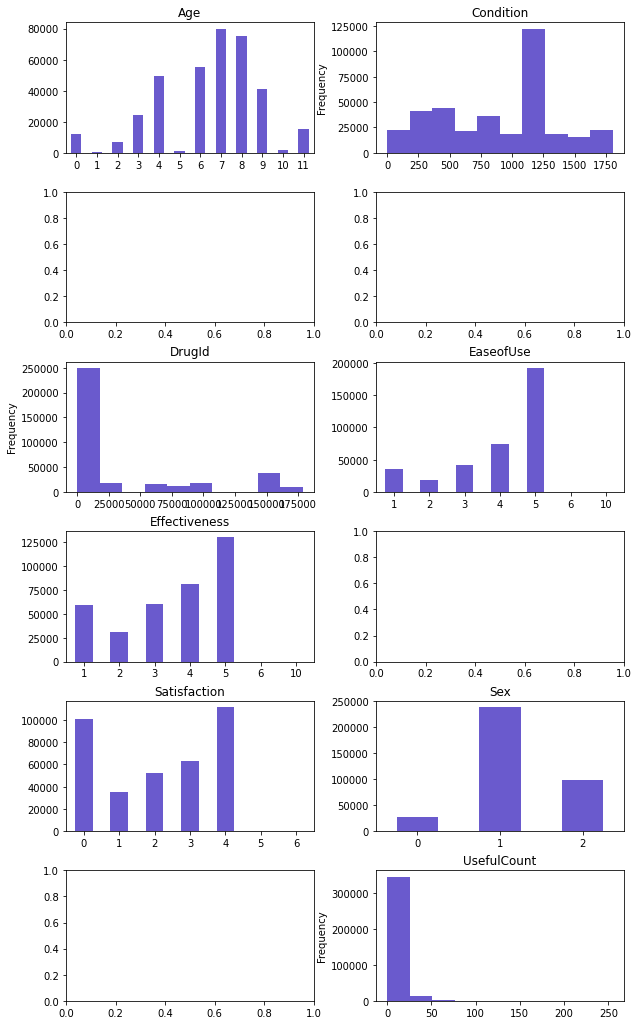

In [83]:
rsm.distr_plot(webmd)

In [82]:
label_encoder_feat = {}
for feature in ['Age', 'Condition','Sex','Satisfaction']:
    label_encoder_feat[feature] = LabelEncoder()
    webmd[feature] = label_encoder_feat[feature].fit_transform(webmd[feature])

In [84]:
from sklearn.linear_model import LogisticRegression
import pyrsm as rsm

In [85]:
df_train, df_test = train_test_split(webmd, test_size=0.3, random_state=42) 

In [86]:
X_train = df_train[['Age', 'Condition','EaseofUse','Effectiveness','Sex']]
y_train = df_train['Satisfaction'].astype("category")
X_test = df_test[['Age', 'Condition','EaseofUse','Effectiveness','Sex']]
y_test = df_test['Satisfaction'].astype("category")

In [87]:
Xs = rsm.scale_df(
    X_train, # variables u want to standaridize
 #what is the training data, variables that indicates what are the training rowsin ur data 
)
Xs["Satisfaction"] = df_train['Satisfaction']
Xs

,Age,Condition,EaseofUse,Effectiveness,Sex,Satisfaction
188945,0.116972,0.332520,0.372245,-0.870565,-0.178608,0
354187,0.116972,0.344298,0.372245,0.504374,-1.084630,4
47310,-0.092673,0.332520,0.372245,-0.870565,-0.178608,0
101018,0.536262,0.117294,-0.386545,-0.526831,0.727414,1
280144,0.116972,-0.745748,-0.386545,0.160639,-0.178608,3
...,...,...,...,...,...,...
119879,-0.092673,0.041270,0.372245,0.504374,0.727414,4
259178,0.326617,0.597001,-0.386545,0.504374,0.727414,4
131932,-0.092673,0.365714,-0.007150,0.160639,-0.178608,3
146867,0.116972,0.930011,0.372245,0.504374,-1.084630,4


In [88]:
X_train.dtypes

Age              int64
Condition        int64
EaseofUse        int64
Effectiveness    int64
Sex              int64
dtype: object

In [91]:
import statsmodels.formula.api as smf
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

In [92]:
lr = smf.glm(
    formula="Satisfaction ~ Age + Condition + EaseofUse + Effectiveness+Sex" ,
    data= Xs,
).fit()

In [93]:
(
    rsm.or_ci(lr, importance=True, data=df_train)
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

,index,OR,OR%,2.5%,97.5%,p.values,,dummy,importance,mean,std,min,max
0,Effectiveness,9.436,843.6%,9.353,9.520,< .001,***,False,9.436,3.533,1.455,1.0,6.0
1,EaseofUse,1.780,78.0%,1.764,1.796,< .001,***,False,1.780,4.019,1.318,1.0,6.0
2,Condition,1.142,14.2%,1.133,1.150,< .001,***,False,1.142,891.458,466.953,0.0,1805.0
3,Age,1.080,8.0%,1.072,1.088,< .001,***,False,1.080,6.442,2.385,0.0,11.0
4,Sex,1.054,5.4%,1.046,1.062,< .001,***,False,1.054,1.197,0.552,0.0,2.0


<Figure size 720x576 with 0 Axes>

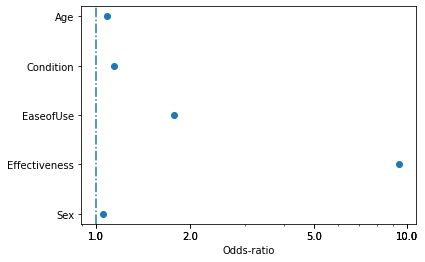

In [94]:
plt.figure(figsize = (10,8))
fig = rsm.or_plot(lr)